# The numpy.random Package

## Overview
Numpy.random is the sub-package of the numpy numerical computing Python package that deals with random (really pseudo-random [1]) number generation. Two classes `numpy.random.BitGenerator` and `numpy.random.Generator` are used together to generate pseudo random numbers. `Generator` can be instantiated in two ways;
1. by calling the constructor with the name of the desired BitGenerator algorithm, or;
1. by calling `numpy.random.default_rng()`, a convenience function which will return a `Generator` object instantiated with the default `BitGenerator`, currently PCG64 [1]  

The second method is the one recommended by the numpy documentation [1].

`numpy.random.BitGenerator` is the base class for all of the bit generators provided by the numpy package. It is an abstract class and so cannot be instantiated. Several BitGenerators are provided by numpy. Of particular interest are `PCG64`, the default `numpy.random` BitGenerator, and `MT19937`, also known as the *Mersenne Twister*[1], the Python language's standard BitGenerator[1]. The `BitGenerator` base class provides the attribute `seed` which is used to intialise whichever BitGenerator is instantiated so that the sequence of numbers it produces are deterministic and therefore reproduceable[8]. If no seed is passed one isgenerated from system entropy[9]. Where a seed is passed the `numpy.random.SeedSequence` class is used to derive the `BitGenerator`'s initial state [9].

In [1]:
# Imports
import numpy as np
# Used to initilaise current default BitGenerator
from numpy.random import default_rng
# Used to initialise any available BitGenerator
from numpy.random import Generator
# Two of numpy's BitGenerators
from numpy.random import PCG64, MT19937
# For plotting distributions, etc
import matplotlib.pyplot as plt

Below is a demonstration of `numpy.random.default_rng()`. 

In [2]:
# Initialise Generator with default 
# BitGenerator (PCG64) with seed 0
rng = default_rng(0)
print(f"Type returned by default_rng():\t\t{type(rng)}")
print(f"BitGenerator returned by default_rng():\t{rng.bit_generator}")

Type returned by default_rng():		<class 'numpy.random._generator.Generator'>
BitGenerator returned by default_rng():	<numpy.random._pcg64.PCG64 object at 0x7fdd7f29a300>


In [3]:
print("State of BitGenerator returned by default_rng(0):")
display(rng.bit_generator.state)

State of BitGenerator returned by default_rng(0):


{'bit_generator': 'PCG64',
 'state': {'state': 35399562948360463058890781895381311971,
  'inc': 87136372517582989555478159403783844777},
 'has_uint32': 0,
 'uinteger': 0}

In [4]:
# Generate 10 integers using Generator 
print(rng.integers(0,10, 10))
print(rng.bit_generator.state['state'])
# Generate another 10 integers
print(rng.integers(0,10, 10))
print(rng.bit_generator.state['state'])
print(rng.bit_generator.state['state'])

[8 6 5 2 3 0 0 0 1 8]
{'state': 133411349017971402732463711865589153492, 'inc': 87136372517582989555478159403783844777}
[6 9 5 6 9 7 6 5 5 9]
{'state': 171367656177275072274709569355545309177, 'inc': 87136372517582989555478159403783844777}
{'state': 171367656177275072274709569355545309177, 'inc': 87136372517582989555478159403783844777}


In [5]:
generator = Generator(PCG64(0))
print(generator.integers(0,10, 10))
print(generator.integers(0,10, 10))

[8 6 5 2 3 0 0 0 1 8]
[6 9 5 6 9 7 6 5 5 9]


In [6]:
pcg64 = PCG64(0)
print(pcg64.random_raw(10))
pcg64.state['state']

[11749869230777074271  4976686463289251617   755828109848996024
   304881062738325533 15002187965291974971 16837368535893154894
 11190454901533422207 13456836363123071557 10028111089635196863
 17249041691996241901]


{'state': 171367656177275072274709569355545309177,
 'inc': 87136372517582989555478159403783844777}

In [7]:
ss = np.random.SeedSequence()
print(ss.entropy)
ss2 = np.random.SeedSequence()
print(ss2.entropy)
ss.generate_state(10, 'uint64')

131803725754078276671311847852038835243
316589896003602948369135258984659599982


array([  957662902529280306, 17470429499150930001, 17076330805317113629,
        1406567666142224721,  2136082790478097124,  8152566603072537230,
       13177070720113687474, 12089605559859518407,  1522517660708819503,
        5840636193616089778], dtype=uint64)

## Creating simple random data with `numpy.random`
The `Generator` class provides four methods for generating collections of random numbers when the probability distributions of those numbers is not important: `integers()`, which generates integers, `random()`, which generates floats,`choice()` which returns random selections from a passed list, and `bytes()`, which generates a string of random bytes.

### `numpy.random.Generator.integers()`
Signature : `integers(low, high=None, size=None, dtype=np.int64, endpoint=False)`

This method generates random integers in the range (`low`, `high`). It will return a single integer if called with one or two arguments. If called with one numeric argument, $a$ it will return an unsigned integer, $n$ such that $n{\lt}a$, or, if the boolean argument `endpoint` is `True`, $n{\le}a$. If called with two numeric arguments $a$, $b$, the integer $n$ will be $a{\le}n{\lt}b$, or $a{\le}n{\le}b$ if `endpoint=True`.

The method will return an array of random integers in the desired range if given an argument for the `size` parameter. A single value will be interpreted as a length for a *1-d* array. A tuple will be interpreted as dimension sizes for an *n-d* array. Finally, an array-like data structure can be passed as the low or hig range arguments in which case each member of the array will be interpreted as the low or high value for that element of an array of random integers.

The integers returned by this method follow a discrete uniform distribution, meaning that the number of possible values is countable (*i.e.* finite) and that each possible value is equally likely to occur.

[84 28 58 ... 76 67 91]


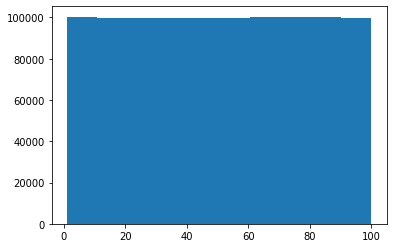

In [8]:
rng = default_rng(997878)
ints = rng.integers(1, 101, 1000000)
print(ints)
plt.hist(ints)
plt.show()

In [9]:
rng.integers((2,4,6,8))

array([0, 3, 0, 3])

[2 6 2 ... 4 6 3]


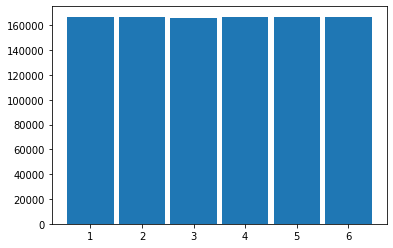

In [10]:
die_rolls = rng.integers(1, 6, size=1000000, endpoint=True)
print(die_rolls)
plt.hist(die_rolls, bins=(1,2,3,4,5,6,7), align="left", rwidth=0.9)
plt.show()

### `numpy.random.Generator.random()`
Signature: `random(size=None, dtype=np.float64, out=None)`

This method generates floats, $n$, such that $0.0{\le}n{\lt}1.0$. With no arguments the method returns a single number. If an int is passed to the size parameter it is treated as the length of an array or random floats, and if a tuple is passed each element is treated as the size of a dimension in an *n-d* array.

The random floats generated by this method are drawn from a continuous uniform distribution, meaning that the number of possible values is not countable but that each possible value is equally likely to occur. Collections of floats in intervals other than $[0.0, 1.0)$ may be generated by adding the lower interval limit the product of the interval length and the output of `random()`; e.g. $(b-a)(random())+a$ to generate random floats in the interval $[a,b)$.

In [11]:
print(rng.random())
print((10-5)*rng.random()+5)

0.9300225506858544
8.501929205891987


### `numpy.random.Generator.choice`
Signature: `choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)`

This method returns random samples from array-like collections. Passed an int it will behave like [`integers()`](numpy.random.Generator.integers()) and treat the argument as the upper limit of an open interval with 0 as the lower limit, returning a random integer from that interval. The `size` parameter allows the number of choices returned, as well as their shape to be selected in exactly the same manner as in the [`integers()`](numpy.random.Generator.integers()) method. If passed an n-dimensional array the axis along which to take the sample can be specified. If, for instance, a *2-d* array is passed, along with an `axis` argument of 0 (the default), then the method will return a random selection of `size` rows, and `axis=1` will return a random selection of `size` columns. Whether or not the sample is taken with replacement, that is whether a value can be selected more than once, can be specified with the `replace` parameter.

The randaom values are selected using a uniform distribution, with each value having an equal chance of being selected. However, an array-like collection of probabilities can be passed, one for each possible choice. These probabilities must sum to 1.

In [55]:
names = ['Anna', 'Ramona', 'Fiachra', 'Fiona']
winner = rng.choice(names, 2, p=[0.2,0.2,0.4,0.2])
xx = rng.choice(4, size=[28,28], p=[0.5, 0.2, 0.2, 0.1])
print(rng.integers(9))
for w in range(10):
    winners = rng.choice(names, 2, p=[0.2,0.2,0.4,0.2], replace=False)
    print(winners)

4
['Anna' 'Fiona']
['Fiachra' 'Fiona']
['Ramona' 'Fiachra']
['Fiona' 'Fiachra']
['Ramona' 'Fiachra']
['Fiona' 'Fiachra']
['Anna' 'Fiona']
['Ramona' 'Fiachra']
['Fiona' 'Fiachra']
['Fiachra' 'Fiona']


In [58]:
names = [['Anna', 'Ramona', 'Fiachra', 'Fiona'],['Homer','Bart', 'Lisa', 'Maggie']]
print(rng.choice(names, 1, axis=0))

[['Homer' 'Bart' 'Lisa' 'Maggie']]


In [60]:
d = np.arange(100).reshape(10,10)
d

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [64]:
print(rng.choice(d, 5, axis=0))

[[60 61 62 63 64 65 66 67 68 69]
 [90 91 92 93 94 95 96 97 98 99]
 [90 91 92 93 94 95 96 97 98 99]
 [50 51 52 53 54 55 56 57 58 59]
 [80 81 82 83 84 85 86 87 88 89]]


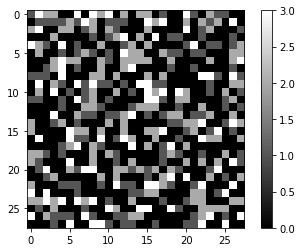

In [48]:
plt.imshow(xx, cmap="gray")
plt.colorbar()

### `numpy.random.Generator.bytes`
Signature: `bytes(length)`

The `bytes` method returns a string of random bytes of the length passed.

In [41]:
display(rng.bytes(50).decode('cp1250'))

'\x0eâJŘç\x12„\x1f&÷˛SXńn¶°hr†ţçí‚łSő…Ę\x05ö\x04Ńę[t\x13ëzŮâä;íŁiÁÂ5\x18'

\xe2h\x18\x08\x04\xab\xeco

## Random permutations of sequences with `numpy.random`

Three methods are provided for the random reordering of sequences: `shuffle`, 

### `numpy.random.Generator.shuffle`
Signature: shuffle(x, axis=0)

The `shuffle()` method shuffles an array-like in-place. If passed an *n-d* array, the `axis` parameter, which defaults to 0, determines which axis gets shuffled. For instance, in the case of a *2-d* array, `axis=0` causes the order of the rows to change without reordering the values within the rows, while `axis=1` reorders the columns without affecting element order within the columns.

### `numpy.random.Generator.permutation`
Signature: `permutation(x, axis=0)

### `numpy.random.Generator.permuted`
Signature:`permuted(x, axis=None, out=None)`

## Some distribution functions

### 1. The Gumbel Distribution
#### `random.Generator.gumbel`
$$ p(x)=\frac{e^{-(x-\mu)/\beta}}{\beta}e^{-e^{-(x-\mu)/\beta}} $$



### 2.

### 3.

### 4.

### 5.

## Seeds

PCG64 Details
Comparison between PCG64 and Mersenne Twister with focus on on performance (i.e. how does PCG64 outperform MT19937?)

Setting seeds in numpy rng

***
## References

## RNG General
[1] https://www.pcg-random.org/rng-basics.html

### PCG
[2] Lemire, D., 2017, On Melissa O’Neill’s PCG random number generator, https://lemire.me/blog/2017/08/15/on-melissa-oneills-pcg-random-number-generator/

[3] O' Neill, M., 2014, PCG, A Family of Better Random Number Generators, https://www.pcg-random.org/

[4] O' Neill, M., 2014, PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation, https://www.pcg-random.org/pdf/hmc-cs-2014-0905.

### RNG Seeding
[5] Woodcock, H., 2021, Stop using numpy.random.seed(), https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

### Numpy Docs
[7] https://numpy.org/doc/stable/reference/random/index.html

[8] https://numpy.org/doc/stable/reference/random/bit_generators/index.html

[9] https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html